# DIABETES PREDICTION MODEL

# CLASSIFICATION MODELS - HOLDOUT

'''
Steps to follow:
    - Load the saved dataset
    - General View
    - Modeling
        - Base models: LogisticRegression, GaussianNB, SVC, DecisionTreeClassifier,RandomForestClassifier, XGBClassifier,
    - Model Evaluation
'''

In [1]:
# Import dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [2]:
# Load the preprocessed dataset
diabetes_preprocessed = pd.read_csv(r'diabetes_prepared.csv')
df = diabetes_preprocessed.copy()

In [3]:
## GENERAL VIEW

df.head()
df.shape
df.info()
df.columns
df.index
df.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Pregnancies/Age           768 non-null    float64
 10  BMIRanges_Obese           768 non-null    int64  
 11  BMIRanges_Overweight      768 non-null    int64  
 12  BMIRanges_Underweight     768 non-null    int64  
 13  AgeRanges_Senior          768 non-null    int64  
 14  AgeRanges_

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.000,3.845,3.370,0.000,0.000,1.000,3.000,6.000,9.000,10.000,13.000,17.000
Glucose,768.000,121.677,30.464,44.000,86.700,99.750,117.000,140.250,167.000,181.000,196.000,199.000
BloodPressure,768.000,72.389,12.106,24.000,58.000,64.000,72.000,80.000,88.000,90.000,106.000,122.000
SkinThickness,768.000,29.090,8.891,7.000,18.000,25.000,28.000,32.000,40.000,44.000,51.330,99.000
Insulin,768.000,141.754,89.101,14.000,67.000,102.500,102.500,169.500,210.000,293.000,519.900,846.000
BMI,768.000,32.435,6.880,18.200,24.000,27.500,32.050,36.600,41.500,44.395,50.759,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.165,0.244,0.372,0.626,0.879,1.133,1.698,2.420
Age,768.000,33.241,11.760,21.000,22.000,24.000,29.000,41.000,51.000,58.000,67.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000
Pregnancies/Age,768.000,0.108,0.082,0.000,0.000,0.042,0.095,0.167,0.216,0.262,0.326,0.368


In [4]:
# Check for missing values
df.isnull().values.any()
df.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
GlucoseLevels_Normal        0
GlucoseLevels_Low           0
AgeRanges_Young             0
AgeRanges_Senior            0
BMIRanges_Underweight       0
BMIRanges_Overweight        0
BMIRanges_Obese             0
Pregnancies/Age             0
Outcome                     0
Age                         0
DiabetesPedigreeFunction    0
BMI                         0
Insulin                     0
SkinThickness               0
BloodPressure               0
GlucoseLevels_Secret        0
dtype: int64

In [6]:
# MODELING

# Define dependent and independent variables
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)

NameError: name 'train_test_split' is not defined

In [ ]:
# Evaluate each model in turn by looking at train and test errors and scores
def evaluate_classification_model_holdout(models):
    # # Split the dataset into train and test sets
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, )

    # Define lists to track names and results for models
    names = []
    train_accuracy_results = []
    test_accuracy_results = []

    print('################ Accuracy scores for test set for the models: ################\n')
    for name, model in models:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_accuracy_result = accuracy_score(y_train, y_train_pred)
        test_accuracy_result = accuracy_score(y_test, y_test_pred)
        train_accuracy_results.append(train_accuracy_result)
        test_accuracy_results.append(test_accuracy_result)

        names.append(name)
        msg = "%s: %f" % (name, test_accuracy_result)
        print(msg)

    print('\n################ Train and test results for the model: ################\n')
    data_result = pd.DataFrame({'models': names,
                                'accuracy_train': train_accuracy_results,
                                'accuracy_test': test_accuracy_results})
    print(data_result)

    # Plot the results
    plt.figure(figsize=(15, 12))
    sns.barplot(x='accuracy_test', y='models', data=data_result.sort_values(by="accuracy_test", ascending=False), color="b")
    plt.xlabel('Accuracy Scores')
    plt.ylabel('Models')
    plt.title('Accuracy Scores For Test Set')
    plt.show()

: 

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.733766
Naive Bayes: 0.584416
SVM: 0.837662
CART: 0.876623
RF: 0.883117
XGBoost: 0.870130

################ Train and test results for the model: ################

               models  accuracy_train  accuracy_test
0  LogisticRegression           0.793          0.734
1         Naive Bayes           0.547          0.584
2                 SVM           0.850          0.838
3                CART           1.000          0.877
4                  RF           1.000          0.883
5             XGBoost           1.000          0.870


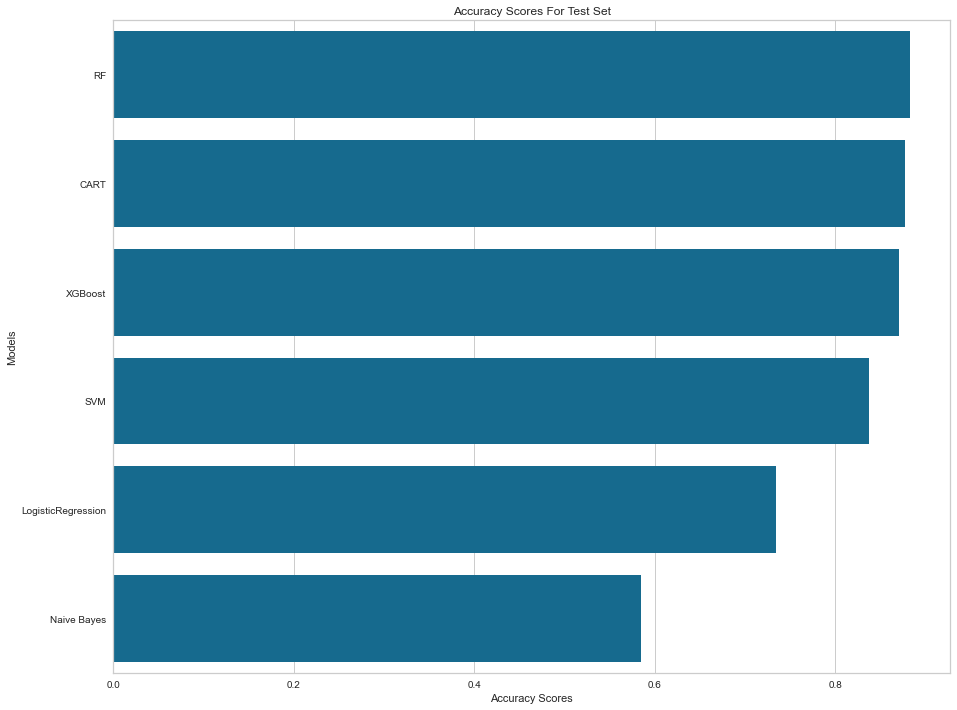

: 

In [ ]:
# See the results for base models

base_models = [('LogisticRegression', LogisticRegression()),
               ('Naive Bayes', GaussianNB()),
               ('SVM', SVC()),
               ('CART', DecisionTreeClassifier()),
               ('RF', RandomForestClassifier()),
               ("XGBoost", XGBClassifier())]

evaluate_classification_model_holdout(base_models)